<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-coloring-book/blob/master/main_coloring_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Interactiv Coloring Book**


![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/coloring_book_picture.png)

**Group Members**
* Johannes Scheibe
* Thilo von Glan 
* Jill Baumann

## Main goal
"Create a coloring template out of a photo"

**Subtasks**

Make and/or select images and load these images
* Handle color space (from BGR to RGB or CIELAB)
  
Segmentate the image into sensible parts/regions/segments
* Different methods possible
  * manually choose each region
  * define the number of regions manually
  * recognize regions automatically, based on color differences 
    * opportunity to change parameters
* Algorithms
  * Preprocessing
    * apply different filters to support the edge detection
      * monochrome picture
      * smooth the image (Gaussian filter)
      * contrast adjustment 
  * Edge detection
    * brightness variation between bordering pixels -> Edge
  * Image segmentation
    * region growing
    * based on colors ((SLIC)Superpixels)

Make the boarder of each segment clearly visible (without colours)

Provide these colors
* Color detection
  * define a set of colors
  * assign colors from the predefined set to the regions based on their (average) color
  * replace colors with appropiate, predefined numbers

User interface 
* upload the picture
* download the result
* adjust settings to get different results




**Scenarios**
* blurred images
* high detailled images
* existing images from coloring books
* faces

# Project Planing

![alt text](https://github.com/uol-mediaprocessing/group-projects-coloring-book/blob/master/Planung.PNG?raw=1)

**Upload Example**

In [5]:
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg

import matplotlib.pyplot as plt
import cv2

preikestolen = cv2.imread("preikestolen.jpg")
preikestolen = cv2.cvtColor(preikestolen, cv2.COLOR_BGR2RGB)


--2019-10-29 20:23:14--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354462 (1.3M) [image/jpeg]
Saving to: ‘preikestolen.jpg.4’

preikestolen.jpg.4  100%[===================>]   1.29M  --.-KB/s    in 0.06s   

2019-10-29 20:23:15 (21.1 MB/s) - ‘preikestolen.jpg.4’ saved [1354462/1354462]



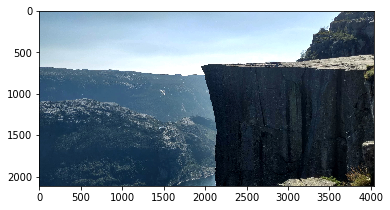

In [6]:
plt.imshow(preikestolen)

make it monochrome

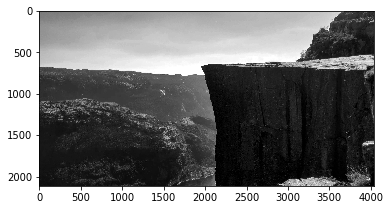

In [7]:
plt.imshow(preikestolen[..., 0], cmap="gray")